### CSE - 221710309059-v praveenkumar

### Assignment -41 (16 JULY 2020)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
!ls 'My Drive/summer internship'

'10 july 2020 class.ipynb'		    '9 july 2020.ipynb'
'11 july 2020 class'			     all_stocks_5yr.csv
' 15 july 2020(weapon_detection_BL).ipynb'  'Assignment-38(10-july-2020).ipynb'
'16 JULY 2020V-CLASS.ipynb'		    'Assignment-39(11-07-20).ipynb'
 20-06-2020.ipynb			     titanic.csv


In [ ]:
#all_stocks_5yr.csv
import pandas as pd
data = pd.read_csv('My Drive/summer internship/all_stocks_5yr.csv')
data.shape

(619040, 7)

In [ ]:
# Top Five rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
data['Name'].value_counts()

UAL     1259
DUK     1259
INCY    1259
CHK     1259
MON     1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

In [ ]:
### How many company's data we have here?
data.Name.nunique()

505

In [ ]:
## Selecting the data AAL
df = data[data['Name']=='TDG']
df.shape

(1259, 7)

In [ ]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
#select the columns data and close price
df = df[['date','close']]
df

,date,close
533033,2013-02-08,143.05
533034,2013-02-11,145.18
533035,2013-02-12,144.91
533036,2013-02-13,144.75
533037,2013-02-14,143.44
...,...,...
534287,2018-02-01,315.20
534288,2018-02-02,307.28
534289,2018-02-05,296.86
534290,2018-02-06,290.66


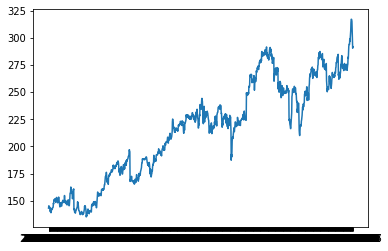

In [ ]:
#line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [ ]:
df.date[:10]

533033    2013-02-08
533034    2013-02-11
533035    2013-02-12
533036    2013-02-13
533037    2013-02-14
533038    2013-02-15
533039    2013-02-19
533040    2013-02-20
533041    2013-02-21
533042    2013-02-22
Name: date, dtype: object

In [ ]:
### Missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [ ]:
## Preparing the data
## Features and target
## Input and output
## last 7 days data as input
## X -- [[d1-d7],[d9,d15],[d17,23]....]
## y -- [d8,d16,d24,...]

## X = [[d1-d7],[d2-d8],]
## y = [d8,d9]

X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-7-1):   
  X.append(df['close'][i:i+7])# 0 -->[0:7], 1-->[1:8]
  y.append(df['close'][i+533040]) 
print(X[:2])

[533033    143.05
533034    145.18
533035    144.91
533036    144.75
533037    143.44
533038    143.77
533039    143.05
Name: close, dtype: float64, 533034    145.18
533035    144.91
533036    144.75
533037    143.44
533038    143.77
533039    143.05
533040    139.86
Name: close, dtype: float64]


In [ ]:
import numpy as np
X = np.array(X)

In [ ]:
df1 = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,143.05,145.18,144.91,144.75,143.44,143.77,143.05
1,145.18,144.91,144.75,143.44,143.77,143.05,139.86
2,144.91,144.75,143.44,143.77,143.05,139.86,141.16
3,144.75,143.44,143.77,143.05,139.86,141.16,142.74
4,143.44,143.77,143.05,139.86,141.16,142.74,138.83


In [ ]:
df1['d8'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,143.05,145.18,144.91,144.75,143.44,143.77,143.05,139.86
1,145.18,144.91,144.75,143.44,143.77,143.05,139.86,141.16
2,144.91,144.75,143.44,143.77,143.05,139.86,141.16,142.74
3,144.75,143.44,143.77,143.05,139.86,141.16,142.74,138.83
4,143.44,143.77,143.05,139.86,141.16,142.74,138.83,139.18


In [ ]:
df1.shape

(1251, 8)

In [ ]:
1251 * 0.8

1000.8000000000001

In [ ]:
## Train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train =  df1['d8'][:1000]
y_test  = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [ ]:
## Sacling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.720846e-16,1.534328e-16,3.625433e-16,2.612355e-16,-8.598677e-17,-2.949863e-16,-5.948575e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.600751e+00,-1.603999e+00,-1.607093e+00,-1.610251e+00,-1.613449e+00,-1.616778e+00,-1.620099e+00
25%,-8.198877e-01,-8.186102e-01,-8.187042e-01,-8.178015e-01,-8.184258e-01,-8.163165e-01,-8.152131e-01
50%,8.418603e-02,8.986731e-02,9.620145e-02,9.806986e-02,1.027375e-01,1.064700e-01,1.091178e-01
75%,6.105218e-01,6.093527e-01,6.081976e-01,6.069466e-01,6.056328e-01,6.042101e-01,6.034346e-01
max,2.112597e+00,2.112840e+00,2.113002e+00,2.113046e+00,2.113012e+00,2.112884e+00,2.112439e+00


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
X_test.shape

(251, 7)

In [ ]:
# number of records , time steps,Features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [ ]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 40529.7490 - val_loss: 57582.6581
Epoch 2/100
1000/1000 [==============================] - 1s 970us/step - loss: 31669.1046 - val_loss: 52582.4088
Epoch 3/100
1000/1000 [==============================] - 1s 990us/step - loss: 28225.1785 - val_loss: 48437.1951
Epoch 4/100
1000/1000 [==============================] - 1s 969us/step - loss: 25434.8621 - val_loss: 44812.5693
Epoch 5/100
1000/1000 [==============================] - 1s 951us/step - loss: 22975.6682 - val_loss: 41527.9688
Epoch 6/100
1000/1000 [==============================] - 1s 947us/step - loss: 20772.6673 - val_loss: 38507.2002
Epoch 7/100
1000/1000 [==============================] - 1s 947us/step - loss: 18781.5743 - val_loss: 35717.0830
Epoch 8/100
1000/1000 [==============================] - 1s 949us/step - loss: 16977.6955 - val_loss: 33150.0860
Epoch 9/100
1000/1000 [============================

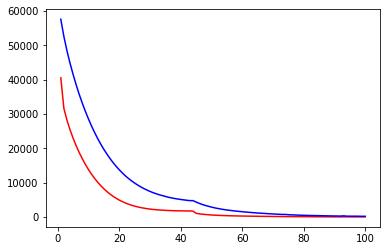

In [ ]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [ ]:
model.predict(X_test_sc)

array([[220.96243],
       [222.83783],
       [225.27626],
       [228.4083 ],
       [232.56506],
       [237.5485 ],
       [242.4446 ],
       [244.85307],
       [246.31473],
       [246.1149 ],
       [245.48233],
       [245.60196],
       [246.1803 ],
       [246.86469],
       [248.21461],
       [249.71176],
       [248.64536],
       [247.18124],
       [246.75523],
       [246.79361],
       [244.91943],
       [242.12589],
       [239.32593],
       [237.39534],
       [235.05438],
       [233.1232 ],
       [231.66731],
       [230.28668],
       [229.14236],
       [229.01083],
       [228.88116],
       [229.40344],
       [229.02083],
       [226.52832],
       [222.33783],
       [217.67389],
       [215.4135 ],
       [215.91624],
       [217.4412 ],
       [219.2593 ],
       [220.29639],
       [220.84544],
       [221.35762],
       [222.24731],
       [223.51   ],
       [224.95355],
       [226.10886],
       [227.77753],
       [229.30386],
       [230.39915],


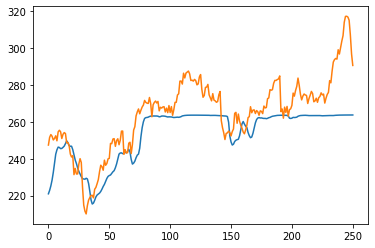

In [ ]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

In [ ]:
X_test_sc[0].reshape(1,7,1)

array([[[0.33250006],
        [0.32609397],
        [0.40247429],
        [0.45065217],
        [0.52973531],
        [0.66566974],
        [1.01958876]]])

In [ ]:
model.predict(X_test_sc[0].reshape(1,7,1))

array([[220.9624]], dtype=float32)

In [ ]:
y_test[1000]

247.43

### Create a Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


### Compile the model with the proper optimizer and loss

In [ ]:
model2.compile(optimizer='adam',loss='mse')

In [ ]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 40736.7879 - val_loss: 58964.0595
Epoch 2/100
1000/1000 [==============================] - 1s 943us/step - loss: 32910.7373 - val_loss: 54327.9435
Epoch 3/100
1000/1000 [==============================] - 1s 953us/step - loss: 29643.1978 - val_loss: 50470.8895
Epoch 4/100
1000/1000 [==============================] - 1s 950us/step - loss: 26990.0906 - val_loss: 47001.6099
Epoch 5/100
1000/1000 [==============================] - 1s 952us/step - loss: 24582.0521 - val_loss: 43857.5317
Epoch 6/100
1000/1000 [==============================] - 1s 951us/step - loss: 22481.2649 - val_loss: 40965.3275
Epoch 7/100
1000/1000 [==============================] - 1s 997us/step - loss: 20510.0483 - val_loss: 38274.5126
Epoch 8/100
1000/1000 [==============================] - 1s 948us/step - loss: 18740.0681 - val_loss: 35767.5743
Epoch 9/100
1000/1000 [============================

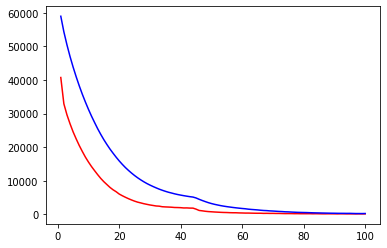

In [ ]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [ ]:
model2.predict(X_test_sc)

array([[220.13951],
       [221.96179],
       [224.32571],
       [227.4786 ],
       [231.88618],
       [236.72266],
       [241.09647],
       [243.037  ],
       [244.35751],
       [244.22931],
       [243.62442],
       [243.58392],
       [243.96405],
       [244.44077],
       [245.42767],
       [246.82532],
       [246.07361],
       [244.93793],
       [244.64172],
       [245.02274],
       [243.9006 ],
       [241.89249],
       [239.76924],
       [238.26321],
       [236.10815],
       [234.22014],
       [232.52383],
       [230.80124],
       [229.26335],
       [229.2347 ],
       [229.3365 ],
       [230.41168],
       [230.6586 ],
       [228.00153],
       [222.77916],
       [217.26329],
       [214.8006 ],
       [215.32271],
       [216.91473],
       [218.73828],
       [219.81558],
       [220.35892],
       [220.78568],
       [221.68367],
       [222.99301],
       [224.52492],
       [225.7827 ],
       [227.58832],
       [229.39233],
       [230.68903],


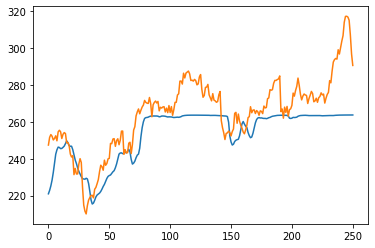

In [ ]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)